In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df =pd.read_csv("Placement.csv")

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
1.#Replace the  NaN Values with correct value and justify why u have choosen in Salary Column
#Replace NaN with 0. 
df["salary"].fillna(0,inplace=True)

The Salary column contains 67 null values, corresponding to students who have not been placed. These NaN values will be replaced with 0 to indicate no salary for unplaced students

In [6]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
#2.How many of them not placed
len(df[df['status']=='Not Placed'])

67

There are a total of 67 students who have not been placed

In [8]:
df['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [9]:
3# find the reason for non-placement from the student

df_notPlaced =df[df['status']=='Not Placed']
df_notPlaced

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,0.0
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,0.0
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,0.0


In [10]:
# Group by work experience and calculate the placement status counts
workex_placement_counts = df.groupby('workex')['status'].value_counts(normalize=True).unstack()

# Print the result
print(workex_placement_counts)

status  Not Placed    Placed
workex                      
No        0.404255  0.595745
Yes       0.135135  0.864865


Students with work experience (Yes) are significantly more likely to be placed (86.49%) compared to those without work experience (No), where only 59.57% were placed. This shows that having work experience increases the chances of securing a placement after completing education.

In [11]:
# 1. Group by gender
gender_grouped = df.groupby('gender').size()
print("Grouping by Gender:")
print(gender_grouped)
print()

# 2. Group by educational percentages (mean)
edu_percentages_grouped = df.groupby('status')[['ssc_p', 'hsc_p','degree_p', 'etest_p', 'mba_p']].mean()
print("Grouping by Educational Percentages (Mean):")
print(edu_percentages_grouped)
print()

# 3. Group by field of specialization
specialization_grouped = df.groupby('specialisation').size()
print("Grouping by Specialization:")
print(specialization_grouped)
print()

# 4. Group by work experience
workex_grouped = df.groupby('workex').size()
print("Grouping by Work Experience:")
print(workex_grouped)
print()

Grouping by Gender:
gender
F     76
M    139
dtype: int64

Grouping by Educational Percentages (Mean):
                ssc_p      hsc_p   degree_p    etest_p      mba_p
status                                                           
Not Placed  57.544030  58.395522  61.134179  69.587910  61.612836
Placed      71.721486  69.926554  68.740541  73.238041  62.579392

Grouping by Specialization:
specialisation
Mkt&Fin    120
Mkt&HR      95
dtype: int64

Grouping by Work Experience:
workex
No     141
Yes     74
dtype: int64



SSC Percentage: Students who were placed had an average SSC percentage of about 71.72%, whereas those not placed averaged around 57.54%.

HSC Percentage: Placed students averaged about 69.93% in HSC, while those not placed averaged 58.40%.

Degree Percentage: Placed students had an average degree percentage of approximately 68.74%, compared to about 61.13% for those not placed.

Entrance Test Scores (etest_p): Placed students had an average score of about 73.24, whereas those not placed averaged around 69.59.

Interpretation: Higher scores in SSC, HSC, degree exams, and entrance tests tend to correlate with higher chances of placement. Academic performance is a crucial factor influencing students' placement outcomes.

In [12]:
import pandas as pd

# Assuming the dataset is loaded into a DataFrame named 'data'
# Example code to find out if specialization plays a role in placement

# Grouping by specialization and status
specialization_placement = df.groupby(['specialisation', 'status']).size().unstack()

# Adding a column for total count of each specialization
specialization_placement['Total'] = specialization_placement.sum(axis=1)

# Calculating proportion of placed students
specialization_placement['Placed Proportion'] = specialization_placement['Placed'] / specialization_placement['Total']

print(specialization_placement)


status          Not Placed  Placed  Total  Placed Proportion
specialisation                                              
Mkt&Fin                 25      95    120           0.791667
Mkt&HR                  42      53     95           0.557895


Mkt&Fin specialization had a placement proportion of 79.17%, with 95 out of 120 students placed.

Mkt&HR specialization had a lower placement proportion of 55.79%, with 53 out of 95 students placed.

Interpretation: Students specializing in Mkt&Fin were more likely to be placed compared to those specializing in Mkt&HR. Therefore, specialization choice in MBA appears to influence placement outcomes, with Mkt&Fin showing a higher placement rate in this dataset.

In [13]:


# Grouping by placement status and calculating mean etest_p
etest_placement = df.groupby('status')['etest_p'].mean()

print(etest_placement)

status
Not Placed    69.587910
Placed        73.238041
Name: etest_p, dtype: float64


In [14]:
# Grouping by degree type and placement status
degree_placement = df.groupby(['degree_t', 'status']).size().unstack()

# Adding a column for total count of each degree type
degree_placement['Total'] = degree_placement.sum(axis=1)

# Calculating proportion of placed students
degree_placement['Placed Proportion'] = degree_placement['Placed'] / degree_placement['Total']

print(degree_placement)


status     Not Placed  Placed  Total  Placed Proportion
degree_t                                               
Comm&Mgmt          43     102    145           0.703448
Others              6       5     11           0.454545
Sci&Tech           18      41     59           0.694915


In [15]:
# Grouping by gender and placement status
gender_placement = df.groupby(['gender', 'status']).size().unstack()

# Adding a column for total count of each gender
gender_placement['Total'] = gender_placement.sum(axis=1)

# Calculating proportion of placed students
gender_placement['Placed Proportion'] = gender_placement['Placed'] / gender_placement['Total']

print(gender_placement)


status  Not Placed  Placed  Total  Placed Proportion
gender                                              
F               28      48     76           0.631579
M               39     100    139           0.719424


In [16]:
gender_placement = df.groupby(['gender', 'status']).size().unstack()
gender_placement

status,Not Placed,Placed
gender,,
F,28,48
M,39,100


In [17]:
#4.  4.What kind of relation between salary and Mba_p

df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


Correlation between mba_p and salary:

The correlation coefficient between mba_p and salary is approximately 0.139823.

This positive correlation suggests a slight tendency for higher MBA percentage (mba_p) to be associated with higher salaries (salary), indicating a weak relationship between the two variables.

In [35]:
5.#which specialization is getting minimum salary


df.groupby('specialisation')['salary'].min()



specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: float64

Students with specializations in both Marketing & Finance and Marketing & HR are receiving a minimum salary of 200,000.

In [19]:
6. #How many of them getting above 5,00,000
len((df[df['salary']>500000]))


3

There are three students who are receiving a salary above 500,000.

In [20]:
7.#Test the analysis of variance between etest_p and mba_p at significance level 5%(Make hyphothesis testing)

import scipy.stats as stats

stats.f_oneway(df['etest_p'],df['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

Null Hypothesis (Ho): The scores (etest_p, mba_p) have equal means.

Alternative Hypothesis (H1): The scores (etest_p, mba_p) have at least one different mean.

Conclusion

Given the F-statistic of approximately 98.64487057324706 and a p-value of approximately 4.672547689133573e-21:

Since the p-value (0.4.672547689133573e-21) is less than the commonly used significance level (e.g., 0.05), we reject the null hypothesis.
Therefore, we have evidence to support the alternative hypothesis that at least one of the means of etest_p, mba_p is statistically different from the others.

In [21]:
8.#test the similarity between the degree_t (sci&Tech) and Specialization(Mkt&HR) with respect to the salary at significance level of 5%
from scipy.stats import ttest_ind


deg = df[df["degree_t"]=='Sci&Tech']['salary']
spec= df[df["specialisation"]=='Mkt&HR']['salary']
ttest_ind(deg, spec)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

Null Hypothesis (Ho): There is no significant difference in the mean salaries between these two groups

Alternative Hypothesis (H1): Alternative hypothesis (H₁) suggests that there is a significant difference.

Conclusion

Given the F-statistic of approximately -2.692041243555374 and a p-value of approximately 0.007897969943471179

Since the p-value (0..07) is less than the commonly used significance level (e.g., 0.05), we reject the null hypothesis.
There is sufficient evidence to conclude that there is a statistically significant difference in salaries between individuals with a Science & Technology degree (deg) and those with a Marketing & HR specialization (spec).

The negative sign of the t-statistic (-2.692) suggests that, on average, individuals with a Marketing & HR specialization (spec) tend to have lower salaries compared to those with a Science & Technology degree (deg).

C:\Users\AB92922\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

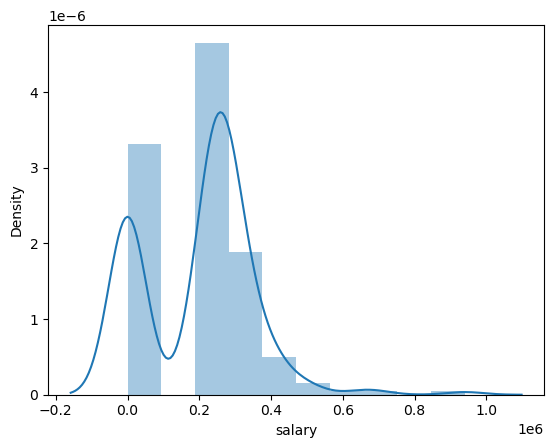

In [22]:
9.#convert normal distrubution in std normal distribution salary column
import seaborn as sns

sns.distplot(df['salary'])

In [23]:
# Import necessary libraries
from matplotlib import pyplot
from scipy.stats import norm
import seaborn as sns

# Define the function to get the probability density function (PDF) probability
def get_pdf_probability(df, startrange, endrange):
    # Create a distribution plot of the data
    ax = sns.distplot(df, kde=True, kde_kws={'color': 'blue'}, color='Green')
    
    # Add vertical lines at the specified start and end range
    pyplot.axvline(startrange, color='Red')
    pyplot.axvline(endrange, color='Red')
    
    # Generate a sample from the dataframe
    sample = df
    
    # Calculate parameters: mean and standard deviation of the sample
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    
    # Define the normal distribution with the calculated mean and standard deviation
    dist = norm(sample_mean, sample_std)
    
    # Generate a list of values within the specified range
    values = [value for value in range(startrange, endrange)]
    
    # Calculate the PDF for each value in the range
    probabilites = [dist.pdf(value) for value in values]
    
    # Sum the probabilities to get the area under the curve within the range
    prob = sum(probabilites)
    
    # Print the result
    print("The area between range({}, {}): {}".format(startrange, endrange, sum(probabilites)))
    
    # Return the calculated probability
    return prob

C:\Users\AB92922\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean=198702.326, Standard Deviation=154780.927
The area between range(700000, 900000): 0.0005973310593974901


0.0005973310593974901

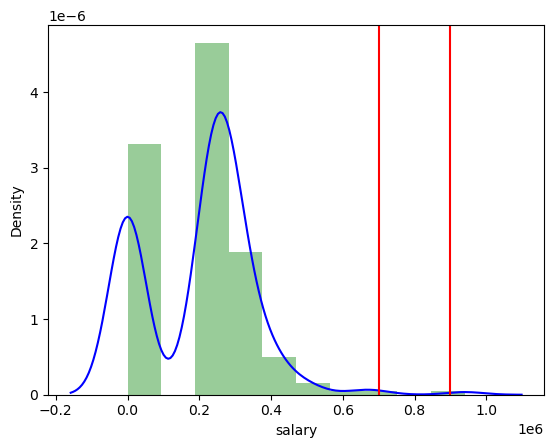

In [24]:
#10.What is the pdf of salary range from 700000 to 900000
get_pdf_probability(df["salary"], 700000, 900000)

In [25]:
# Function to plot a standardized normal distribution graph
def stdNBgraph(df):
    # Calculate mean and standard deviation of the input dataframe `df`
    mean = df.mean()
    std = df.std()
    
    # Create a list `values` containing each value from the dataframe `df`
    values = [i for i in df]
    
    # Calculate the z-score for each value in `values`
    z_score = [(j - mean) / std for j in values]
    
    # Plot the distribution of z-scores using seaborn
    import seaborn as sns
    sns.distplot(z_score, kde=True)
    
    # Calculate and print the mean of z-scores
    print(sum(z_score) / len(z_score))

-8.881784197001253e-17


C:\Users\AB92922\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


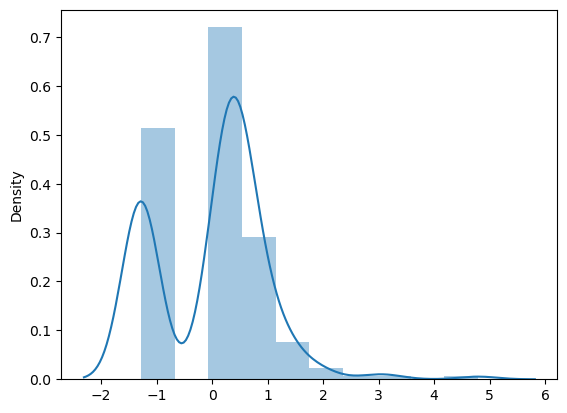

In [26]:
stdNBgraph(df["salary"])

In [27]:
11#test the similarity between the degree_t (sci&Tech)  with respect to the etest_p and mba_p

estest = df[df["degree_t"]=='Sci&Tech']['etest_p']
mba= df[df["degree_t"]=='Sci&Tech']['mba_p']
ttest_ind(estest, mba)

Ttest_indResult(statistic=4.532000225151251, pvalue=1.4289217003775636e-05)

Null Hypothesis (H₀): There is no significant difference between the mean etest_p scores and mba_p scores for individuals with a Science & Technology degree.
Alternative Hypothesis (H₁): There is a significant difference between the mean etest_p scores and mba_p scores for individuals with a Science & Technology degree.

Since the p-value (1.4289217003775636e-05) is less than the commonly used significance level (e.g., 0.05), we reject the null hypothesis.
There is sufficient evidence to conclude that there is a  significant difference between etest_p and mba_p scores among individuals with a Science & Technology degree.



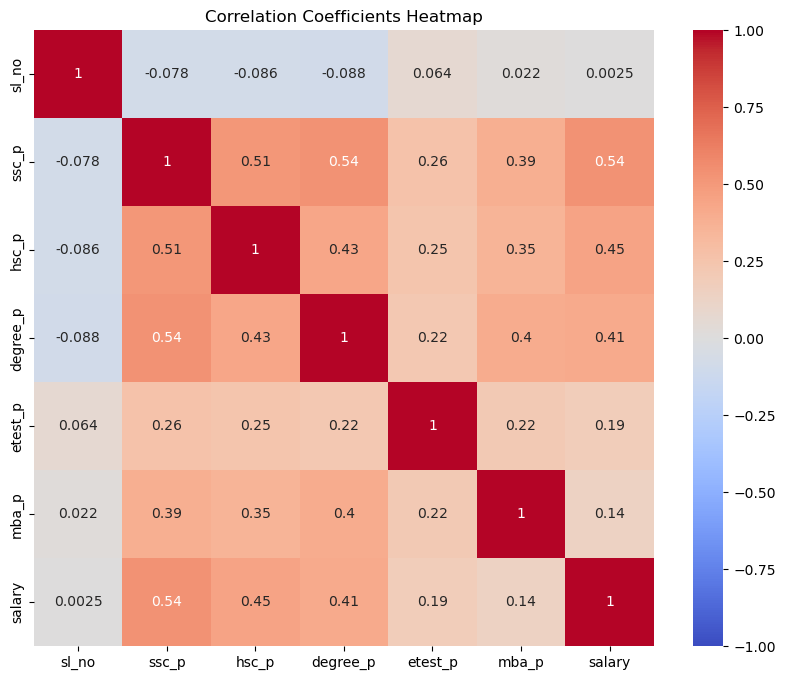

In [28]:
#12.Which parameter is higly correlated with salary
correlation_matrix = df.corr()

# Plot heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Coefficients Heatmap")
plt.show()

In [29]:
def QuanQual(df):
    quan=[]
    qual=[]
    for columnName in df.columns:
        
    #print col
        #print(columnName)
        if(df[columnName].dtype=='O'):
        #print qual
            #print("qual")
            qual.append(columnName)
        else:
        #print quan
            #print("quan")
            quan.append(columnName)
    return quan, qual

In [30]:
quan, qual =QuanQual(df)
print("Quantitive_variables:",quan)
print("Quantitive_variables:",qual)

quan_df = df[quan]  # Create a DataFrame containing only quantitative variables

Quantitive_variables: ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
Quantitive_variables: ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


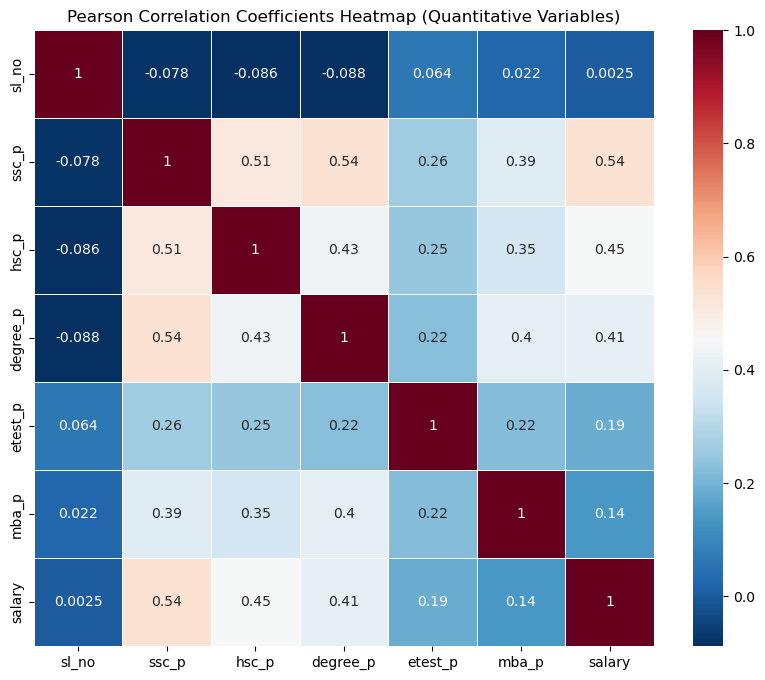

In [31]:
# Assuming 'quan' is your DataFrame containing quantitative variables
# Calculate Pearson correlation coefficients
pearsoncorr = quan_df.corr(method='pearson')

# Plot heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',  # Color map
            annot=True,  # Show numeric annotations
            linewidth=0.5)  # Width of lines that divide each cell

plt.title('Pearson Correlation Coefficients Heatmap (Quantitative Variables)')
plt.show()

Interpretation for ssc_p and salary:

Correlation Coefficient: The correlation coefficient between ssc_p (Secondary School Certificate percentage) and salary is 0.54.

Interpretation: This value indicates a moderate to strong positive correlation. This means that higher SSC percentages are generally associated with higher salaries. In other words, as the SSC percentage increases, the salary tends to increase as well.

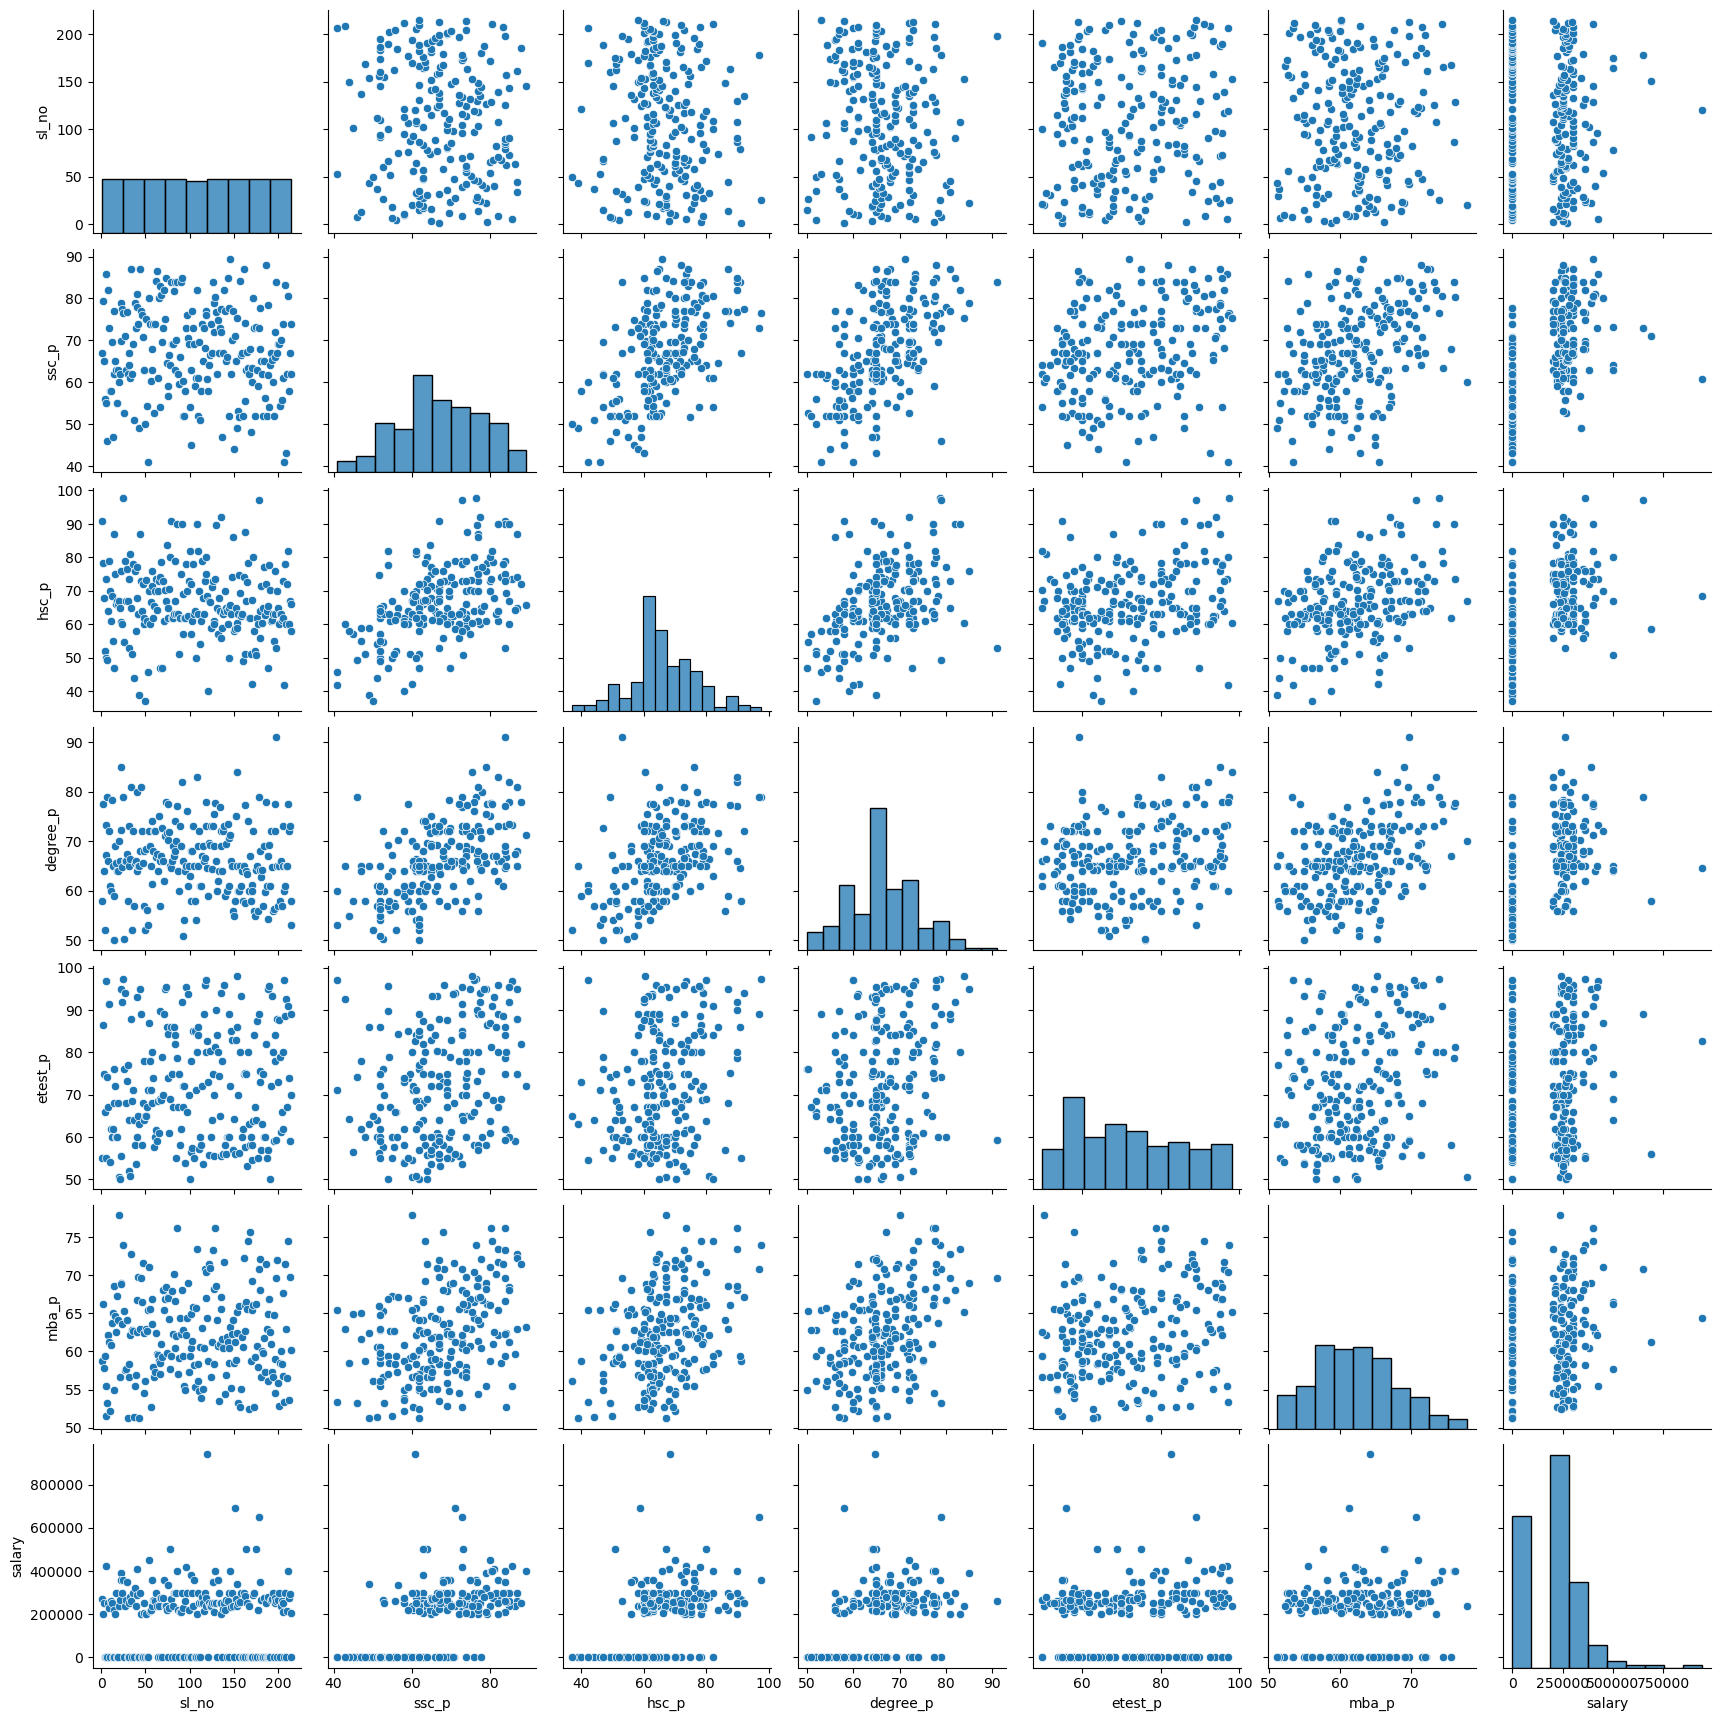

In [32]:
#13.Plot useful graph
sns.pairplot(df)